<a href="https://colab.research.google.com/github/andleebhayath/MLProjects/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis & Prediction of Heart Failure

### Load necessary libraries


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE # deal with imbalance data
from sklearn.preprocessing import MinMaxScaler, PowerTransformer # scale data
import numpy
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate


import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dataset Description

Dataset: 
The Heart failure clinical records dataset contains the medical records of 299 patients who had heart failure.
The dataset contains 11 clinical features (some of them are binary, others are numerical), the follow-up period and the label DEATH_EVENT that indicates whether or not the patient has died.
We can find some features strictly related to medical aspects like levels of enzymes, sodium, creatinine and platelets in the blood and others that are more common like age, sex or smoking.

## Load dataset from UCI repository

In [ ]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
values=data.values


1. Age: age of patient (in years)

2. Anaemia: Decrease of red blood cells or hemoglobin

3. High blood pressure: If a patient has hypertension

4. Creatinine phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

5. Diabetes: If the patient has diabetes

6. Ejection fraction: Percentage of blood leaving the heart at each contraction

7. Sex: Woman or man

8. Platelets: Platelets in the blood (kiloplatelets/mL)

9. Serum creatinine: Level of creatinine in the blood (mg/dL)

10. Serum sodium: Level of sodium in the blood (mEq/L)

11. Smoking: If the patient smokes

12. Time: Follow-up period (in days)

13. (target) death event: If the patient died during the follow-up period

In [ ]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


There are total 13 columns.Target column is a "DEATH EVENT " column.There is no Null value in the dataset.

In [ ]:
# check the duplicate values
data.duplicated().sum()

0

To be consistent with the feature description let's represent the platelets as kiloplatelets/mL

In [ ]:
data.platelets = data.platelets/1000
print(data.platelets)

0      265.00000
1      263.35803
2      162.00000
3      210.00000
4      327.00000
         ...    
294    155.00000
295    270.00000
296    742.00000
297    140.00000
298    395.00000
Name: platelets, Length: 299, dtype: float64


Let's look at the dataset

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263.35803,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1


# Feature distributions 
We can see how features are distributed according to label.

In [ ]:
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

### Class Imbalance Issue

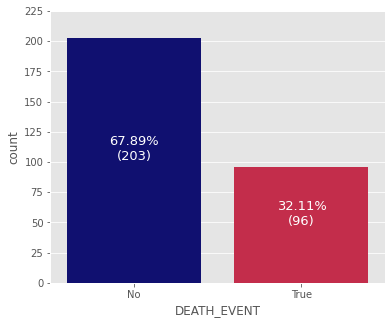

In [ ]:
target_count = data.DEATH_EVENT.value_counts()
death_color = ['navy', 'crimson']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x='DEATH_EVENT', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['No', 'True'])
    plt.yticks(np.arange(0, 230, 25))
    plt.show()

As we can see, even if not so strong, there is a class imbalance.
This can leads to biased results that can be noticed in results.
To handle class inbalance it's possible to re-balance the dataset with different techniques.

## Distribution of numeric feature
Firstly we plot the numerical features (omitting time because is not used in the prediction).
In this case we plot the kernel density estimation with a kdeplot to better see the distribution along with the boxplot.

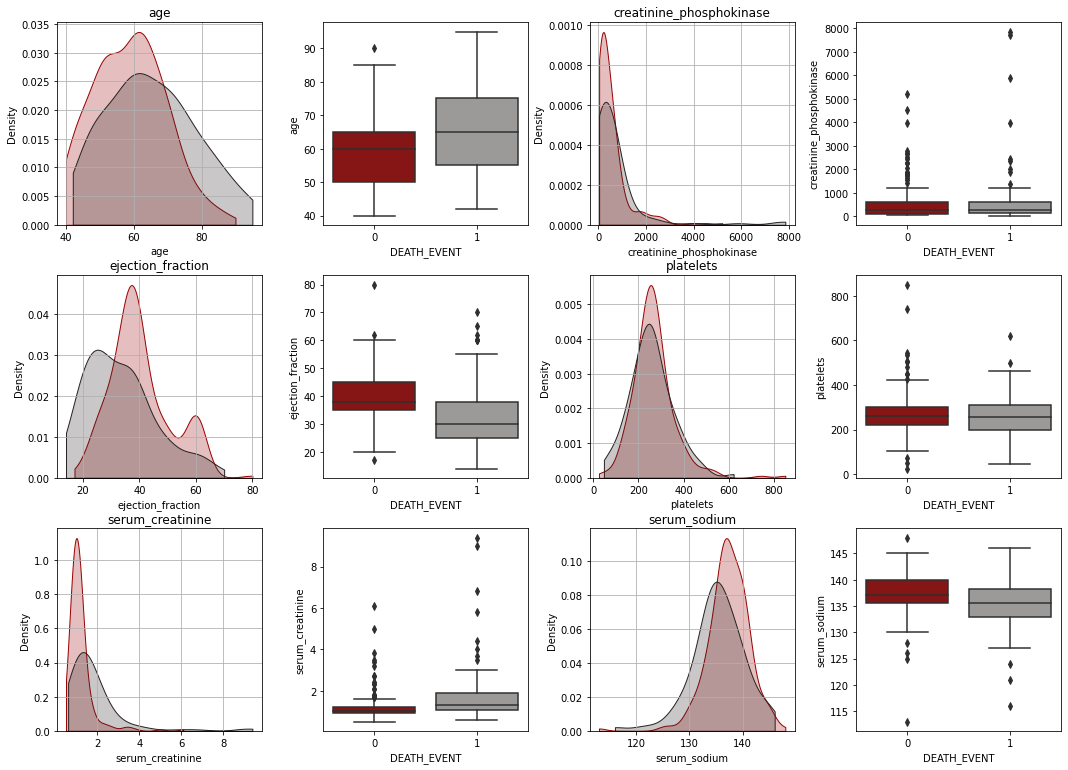

In [ ]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data.loc[data["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(data.loc[data["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = data, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])   

From the plot above, the most informative attributes seem to be ejection_fraction and serum_creatinine.

Here, ploting categorical feature with target feature.

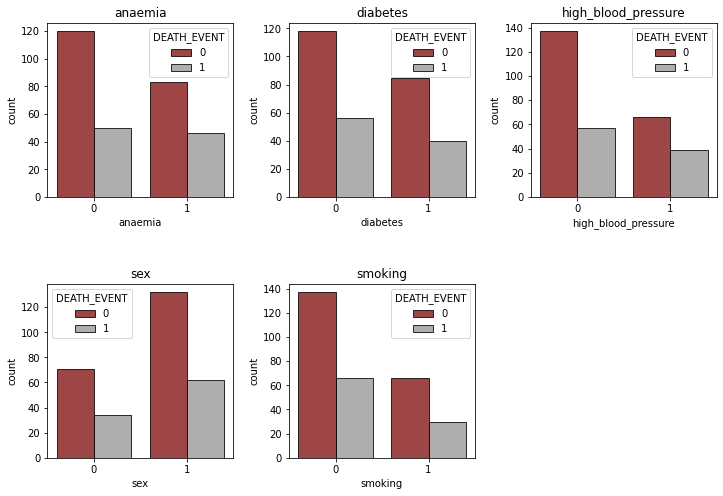

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=data, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

We observe that numerical features have different scale, so we scale the features first.

In [ ]:
data = data.copy()

for i, col in enumerate(numerical_features):
    data[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(data[[col]])
    

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,4,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,6,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,7,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,7,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,8,1


## Correlation Matrix
To see how features are correlated is useful to look at the correlation matrix that is a matrix in which are showed the correlation values of each couple of features according to the Pearson's correlation coefficient:

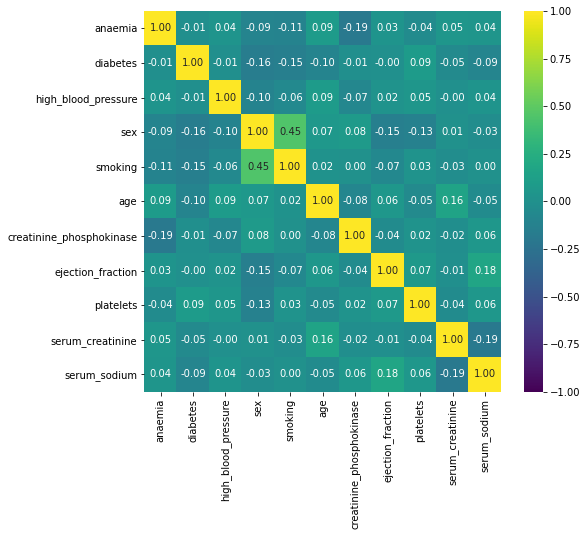

In [ ]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)
plt.figure(figsize=(8, 7))
sns.heatmap(data[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');


From the heatmap we can see that in general, features are quite uncorrelated with the exception of sex and smoking that seems to be slightly positively correlated.

## Point 1 - Fit Logistic Regression
After understanding the dataset our first point is to
Fit a traditional logistic regression model without any regularization penalty (you’ll do this later) to the data, using bootstrapping (size of 10,000 should work) and compute a 95% empirical confidence interval (CI) for each one of the coefficients.

### What is BootStraping:


A method to estimate a Statictic sampling distribution. Bootstrap sample are drawn repeatedly with replacement from the original data.Bootstrap not used for the point estimation.
This technique is used in machine learning to estimate the skill of machine learning models when making predictions on data not included in the training set. This technique helps to fine tune the model even before we give it access to test data (real world data). This allows us to tweak the model hyperparameters to achieve the best score.
A desirable property of the results from estimating machine learning model skills is that the estimated skill can be presented with confidence intervals, a feature not readily available with other methods such as Cross Validation.








### Bootstrap sampling method and Logistic Regression without Regulization

In [ ]:
# configure bootstrap
n_iterations = 10000  #No. of bootstrap samples to be repeated (created)
n_size = int(len(data) * 0.50)  #Size of sample, picking only 50% of the given data in every bootstrap sample

#Lets run Bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
    train = resample(values, n_samples=n_size)   #Sampling with replacement..whichever is not used in training data will be used in test data
    
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])  #picking rest of the data not considered in training sample
    # fit model
    model = LogisticRegression()
    model.fit(train[:,:-1], train[:,-1])  #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
    
	# evaluate model
    predictions = model.predict(test[:,:-1])   #model.predict(X_test)
    score = accuracy_score(test[:,-1], predictions)  #accuracy_score(y_test, y_pred)
    #print(score)
    stats.append(score)
print(score)




0.8156424581005587


Here each Bootstrap iteration sample would create one model and this model is tested against the Out of Bag (test data) of that sample, i.e we will test that sample with the test sample not part of that sample.

### confidence interval

Confidence intervals refers to the % of all possible samples that can be expected to include the true population parameter.

For eg. 95% of all samples would be found in this interval range.

95.0 confidence interval 74.9% and 85.1%


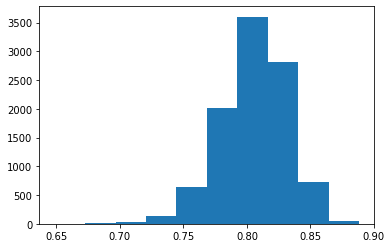

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.hist(stats)
plt.figure(figsize = (10,5))

alpha = 0.95  # for 95% confidence

p = ((1.0-alpha)/2.0) * 100   #tail regions on right and left .25 on each side indicated by P value (border)
#1.0 is total area of this curve, 2.0 is actually .025 thats the space we would want to be 
#left on either side
lower = max(0.0, numpy.percentile(stats, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100  #p is limits

upper = min(1.0, numpy.percentile(stats, p))

print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100, lower*100, upper*100))



# Point 2 - L1 (Lasso) regularization 
Add an L1 (Lasso) regularization penalty to the logistic model with varying values of the regularization strength hyperparameter (aka C, alpha, lambda). For each value of the hyperparameter, use the same bootstrapping procedure from part 1 to determine the 95% empirical CIs of the coefficient estimates. In your notebook as well as presentation, explain the relationship between the hyperparameter values you attempted and the resulting CIs you obtained for the estimates. As you manipulate the hyperparameter (increasing or decreasing), what happens to the CIs and why?

### Logictis Regression with Regulization

(0.867936507936508, {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'})
95.0 confidence interval 76.1% and 85.5%


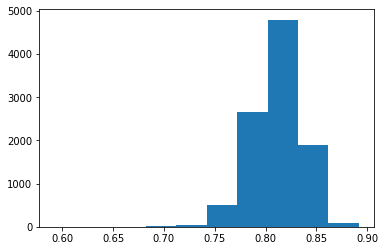

<Figure size 720x360 with 0 Axes>

In [ ]:


# configure bootstrap
n_iterations = 10000#No. of bootstrap samples to be repeated (created) 
n_size = int(len(data) * 0.50)  #Size of sample, picking only 50% of the given data in every bootstrap sample
#Lets run Bootstrap
stats = list()
df = pd.DataFrame( columns=['C', 'penalty', 'solver'])
df1 = pd.DataFrame(columns=['Best', 'Lower', 'Upper'] )
bestlst=[]
lowerlst=[]
upperlst=[]
for i in range(n_iterations):
	# prepare train and test sets
    train = resample(values, n_samples=n_size)  #Sampling with replacement..whichever is not used in training data will be used in test data

    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])  #picking rest of the data not considered in training sample
    # fit model
    # fit model
    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear'] 
    alpha=    [ 0.02, 0.024, 0.025, 0.026, 0.03]
    penalty = ['l1']  # lasso
    c_values = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1] # different values of C hayperparameters
                #[0.001,0.01,0.1,1,10,100]
# define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result =grid_search.fit (train[:,:-1], train[:,-1])  #model.fit(X_train,y_train) i.e model.fit using grid search(train set, train label as it is a classifier)
    #print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_,))
    
# summarize results
    
    predictions = grid_search.predict(test[:,:-1])  #model.predict(X_test)
    score = accuracy_score(test[:,-1], predictions)  #accuracy_score(y_test, y_pred)
    #print(score)
    stats.append(score)
    data=(  grid_result.best_params_,)
    
    
    para=( grid_result.best_score_,)
    my_result = float('.'.join(str(elem) for elem in para))

    df = df.append( pd.DataFrame.from_records(data))
    
    alpha = 0.95  # for 95% confidence

    p = ((1.0-alpha)/2.0) * 100   #tail regions on right and left .25 on each side indicated by P value (border)
#1.0 is total area of this curve, 2.0 is actually .025 thats the space we would want to be 
#left on either side
    lower = max(0.0, numpy.percentile(stats, p))  

    p = (alpha+((1.0-alpha)/2.0)) * 100  #p is limits
    upper = min(1.0, numpy.percentile(stats, p))
    #df['lower']=lower
    #df['upper']=upper
   
    #print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100, lower*100, upper*100))
   
 
    
    bestlst.append(my_result)
    lowerlst.append(lower)
    upperlst.append(upper)
df['Best'] = bestlst
df['Lower'] = lowerlst
df['Upper'] = upperlst
plt.hist(stats)
plt.figure(figsize = (10,5))
print((grid_result.best_score_,  grid_result.best_params_,))
print('%.1f confidence interval %.1f%% and %.1f%%' %(alpha*100, lower*100, upper*100))  
   
    

In [ ]:
df.head()

,C,penalty,solver,Best,Lower,Upper
0,0.10,l1,liblinear,0.823651,0.786885,0.786885
0,0.10,l1,liblinear,0.798413,0.787543,0.812529
0,0.01,l1,liblinear,0.791905,0.788200,0.830605
0,0.01,l1,liblinear,0.800794,0.787191,0.830147
0,0.10,l1,liblinear,0.839365,0.787293,0.841304


In [ ]:
df.tail()

,C,penalty,solver,Best,Lower,Upper
0,0.100,l1,liblinear,0.820635,0.76087,0.854839
0,0.001,l1,liblinear,0.789365,0.76087,0.854839
0,0.100,l1,liblinear,0.897143,0.76087,0.854839
0,0.100,l1,liblinear,0.761111,0.76087,0.854839
0,0.100,l1,liblinear,0.867937,0.76087,0.854839


## Here, the effect of using different regularization values is quite obvious. We can see that at different values of C our confidence interval values also changing.

## Point 3 - Choose Optimal Logistic Model form L1 Regularization

Choose a final, optimal logistic model informed by the regularized work you’ve done in part 2. Is this model significantly different from the model you obtained in the first step (logistic regression without penalty). Include rational about how you arrived at an optimal regularization parameter.


<b> Answer: </b>
I choose a final optimal logistic regression model where best hyperparameter values are <b> {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} </b>. This model is significantly different from the model we obtained in the first step without regulization penalty. Moreover, I have used grid search approch to arrived at an optimal regularization parameter.

## Point 4 - Choose a Final Model
To this point, we’ve focused on logistic regression, but, in this final step, we’d like you to choose a final model that you will use to best predict the outcome. Build this model and present its results to the team. How would you explain a prediction from it to someone who isn’t familiar with the model? Would you recommend putting this model into production? Why or why not?

<b> Anwer: </b> As we can see, even if not so strong, there is a class imbalance.
To handle class imbalance it's possible to re-balance the dataset with different techniques. The rebalancing techniques helps to improve the model performance. 

Here I will try SMOTE technique to rebalance the dataset.


### SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Oversampling Technique) is one of the oversampling techniques that use a minority class to generate synthetic samples. In consequence, it overcomes the overfitting problem raised by random oversampling
 SMOTE works by generating instances that are close in feature space, using interpolation between positive cases that are close to each other. It randomly selects a minority class instance and finds its nearest neighbour. Then it creates synthetic models by randomly choosing one of the neighbours and forms a line segment in the feature space.

In [ ]:
X = data.iloc[:, :-1] 
y = data['DEATH_EVENT'] #target varaable


Why i use random forest for imbalance dataset
Random forest is an ideal algorithm to deal with the extreme imbalance owing to two main reasons. Firstly, the ability to incorporate class weights into the random forest classifier makes it cost-sensitive; hence it penalizes misclassifying the minority class. Secondly, it combines the sampling technique and ensemble learning, therefore, downsampling the majority class and growing trees on a more balanced dataset. There are several other advantages of using a random forest classifier with imbalanced datasets. The algorithm is a strong modelling technique and is much more sturdy than a single decision tree. The aggregation of several trees limits the possibility of overfitting and miscalculations due to bias and, in return, capitulates handy results

In [ ]:

X = data.iloc[:, :-1] 
y = data['DEATH_EVENT'] #target varaable

oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)


Mean f1: 0.893
Mean recall: 0.898
Mean precision: 0.893


After we used SMOTE to oversample the minority class, we similarly trained our model as the Standard Random Forest. The F-1 score of 0.896 has achieved with good precision and recall.
Lets look into the confusion matrix to see how the implementation of SMOTE has influenced it:

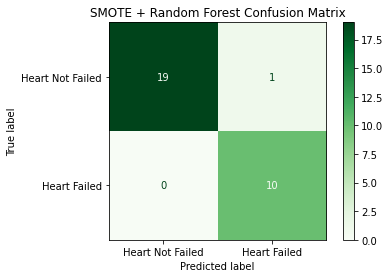

In [ ]:
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=["Heart Not Failed","Heart Failed"], cmap='Greens')
plt.title('SMOTE + Random Forest Confusion Matrix')
plt.show()


However, my analysis is not finalized yet, because looking into feature ranking/selection is not covered in this analysis. Plus, other models (xgboost, gb, xgbrf, LGBM etc.) can be tested for comparision.
ATM, base on the current analysis, I would choose SMOTE Technique with Random Forests Algorithm for production. 
